In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

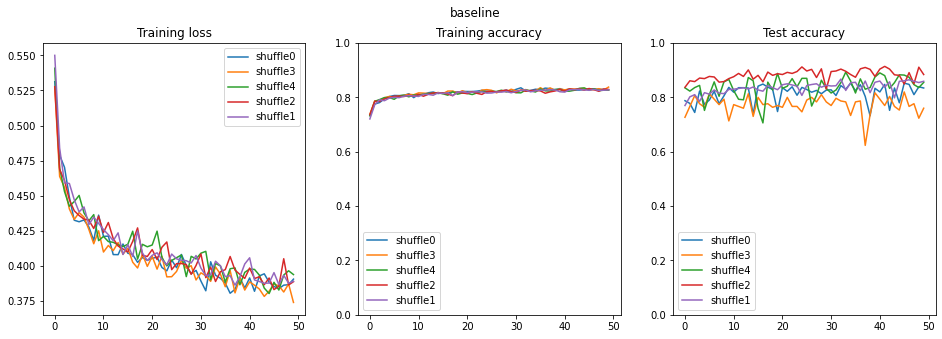

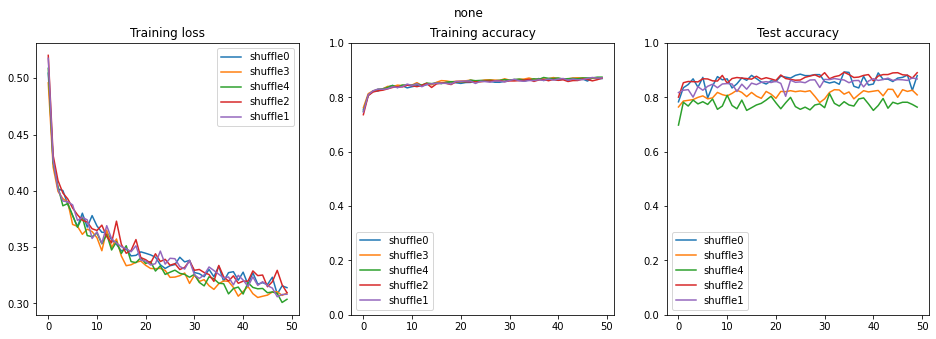

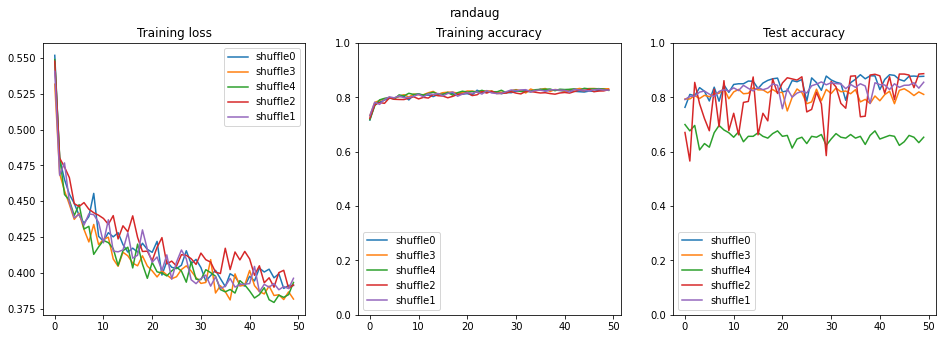

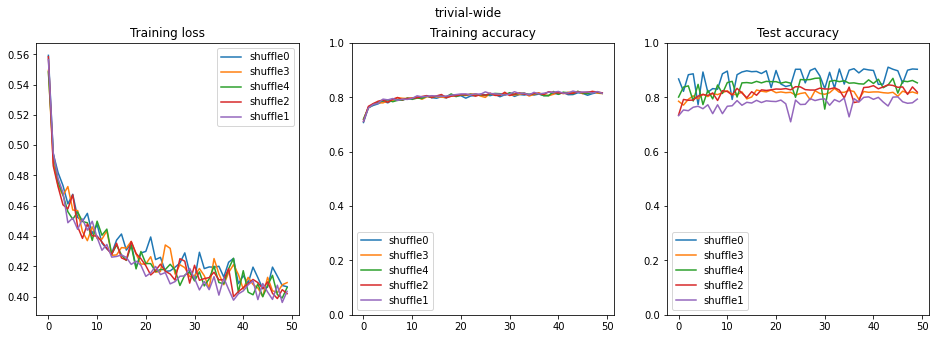

In [3]:
run_dir = Path("runs/benchmark-augmentation")


for group in sorted(run_dir.glob('*/run0')):
    plt.figure(figsize=(16, 5))
    gs = plt.GridSpec(1, 3)
    plt.suptitle(group.parts[-2])
    
    for shuffle in group.glob("shuffle*/"):
        if not (shuffle / 'train.csv').exists():
            continue
        
        ax = plt.subplot(gs[0])
        plt.title("Training loss")
        df = pd.read_csv(shuffle / 'train.csv')
        plt.plot(df.epoch, df.loss, label=shuffle.parts[-1])
        plt.legend()
        
        ax = plt.subplot(gs[1])
        plt.title("Training accuracy")
        df = pd.read_csv(shuffle / 'train.csv')
        plt.plot(df.epoch, df.accuracy, label=shuffle.parts[-1])
        plt.ylim(0, 1)
        plt.legend()
        
        ax = plt.subplot(gs[2])
        plt.title("Test accuracy")
        df = pd.read_csv(shuffle / 'val.csv')
        plt.plot(df.epoch, df.accuracy, label=shuffle.parts[-1])
        plt.ylim(0, 1)
        plt.legend()
        
    plt.show()

Mean accuracy of baseline (n=5) 0.823709090909091
Mean accuracy of none (n=5) 0.8302629370629371
Mean accuracy of randaug (n=5) 0.7525595238095238
Mean accuracy of trivial-wide (n=5) 0.8381718281718282


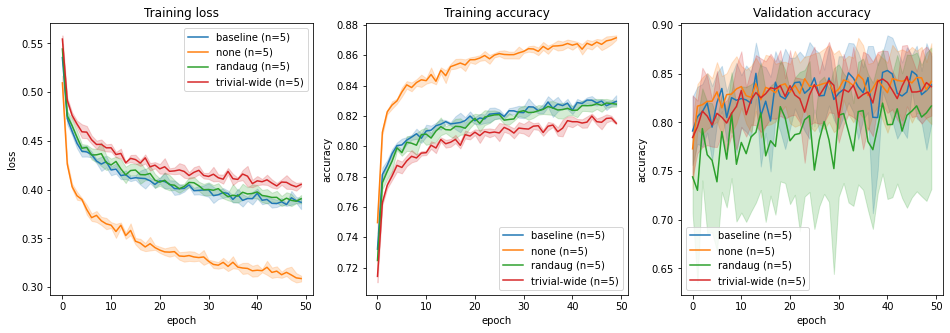

In [4]:
run_dir = Path("runs/benchmark-augmentation")

plt.figure(figsize=(16, 5))
gs = plt.GridSpec(1, 3)
    
for group in sorted(run_dir.glob('*/run0')):
    train_dfs = []
    val_dfs = []
    for shuffle in group.glob("shuffle*/"):
        if not (shuffle / 'train.csv').exists():
            continue
        
        df = pd.read_csv(shuffle / 'train.csv')
        train_dfs.append(df)
        
        df = pd.read_csv(shuffle / 'val.csv')
        val_dfs.append(df)
    
    train_df = pd.concat(train_dfs)
    train_df = train_df.reset_index()
    
    val_df = pd.concat(val_dfs)
    val_df = val_df.reset_index()
    
    label = f"{group.parts[-2]} (n={len(train_dfs)})"
    ax = plt.subplot(gs[0])
    plt.title("Training loss")
    sns.lineplot(data=train_df, x='epoch', y='loss', label=label)
    
    ax = plt.subplot(gs[1])
    plt.title("Training accuracy")
    sns.lineplot(data=train_df, x='epoch', y='accuracy', label=label)
    
    ax = plt.subplot(gs[2])
    plt.title("Validation accuracy")
    sns.lineplot(data=val_df, x='epoch', y='accuracy', label=label)
    
    val_accracy = val_df.groupby('epoch').mean().loc[29, 'accuracy']
    print("Mean accuracy of", label, val_accracy)

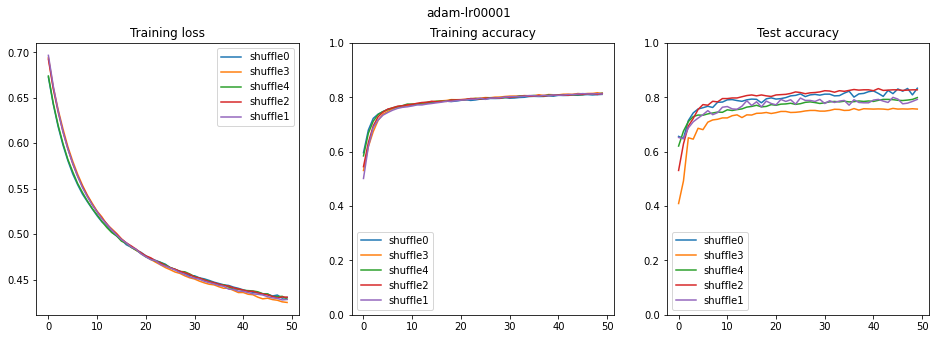

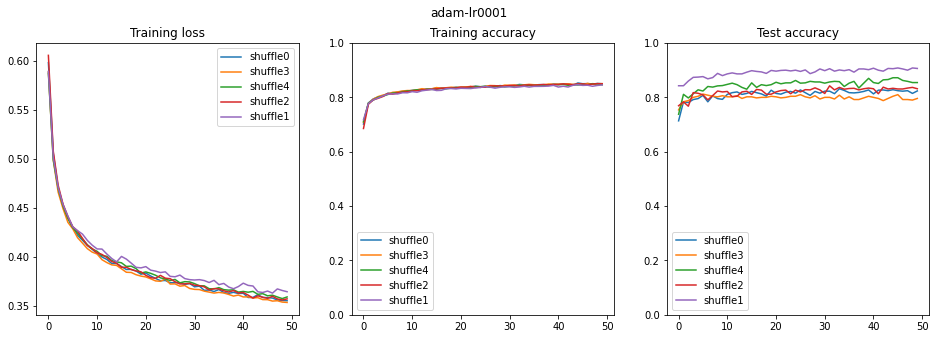

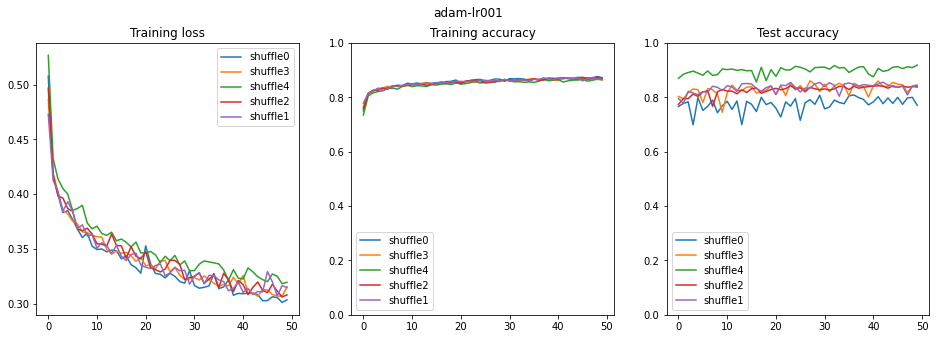

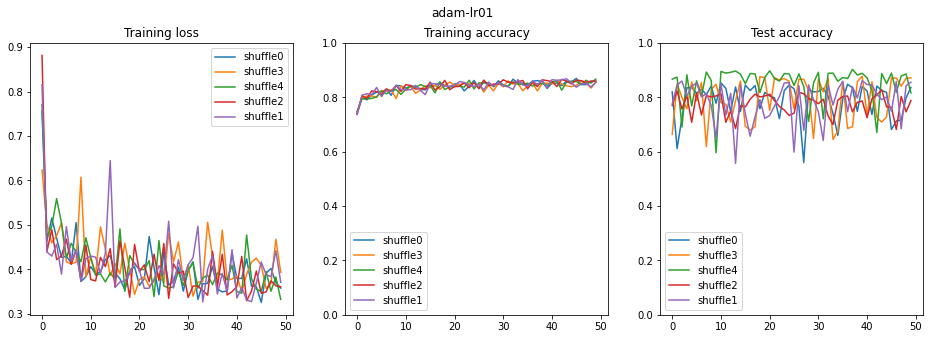

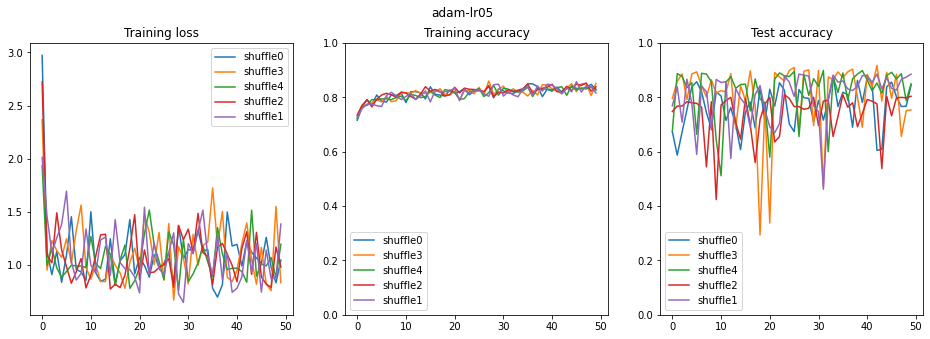

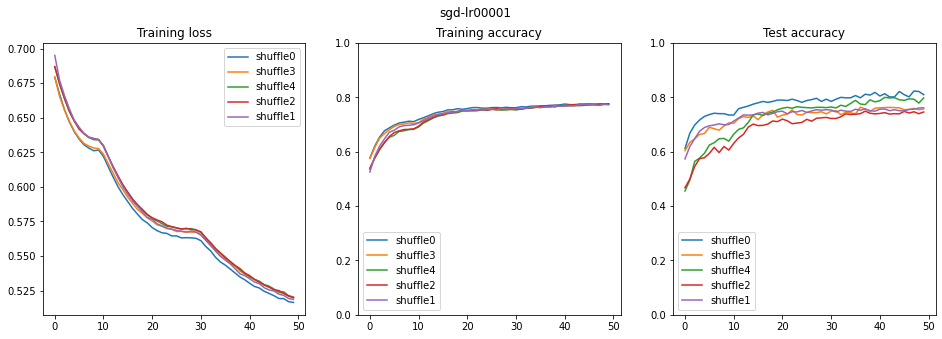

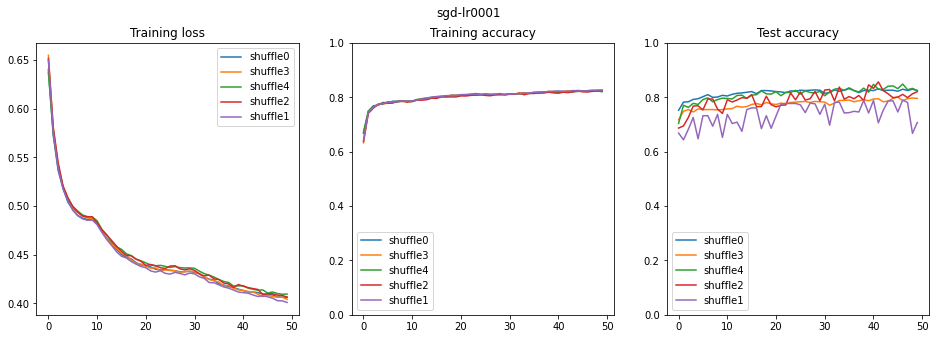

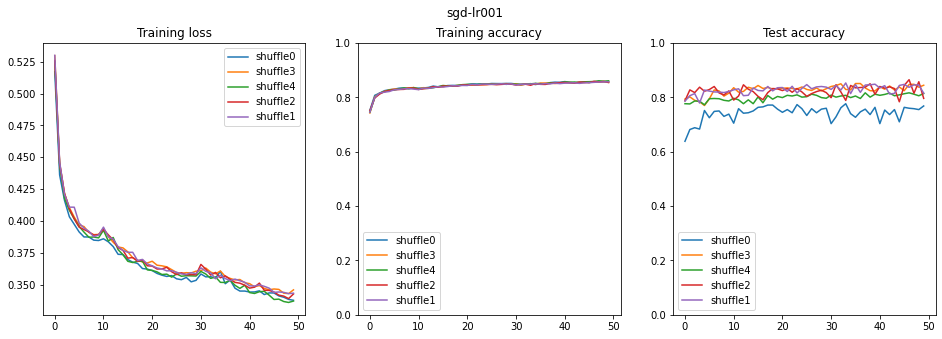

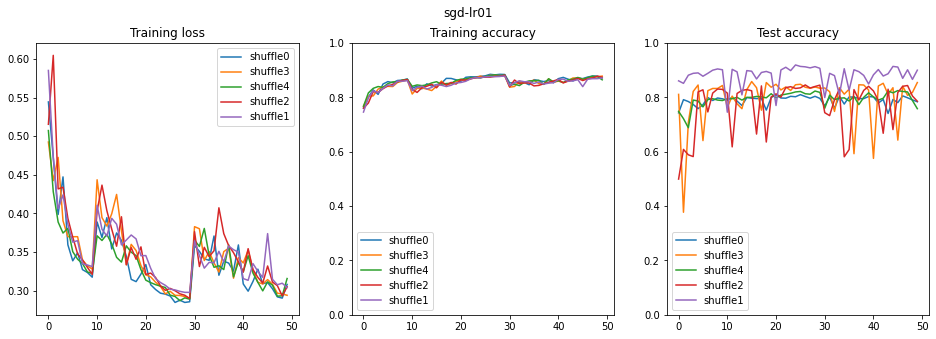

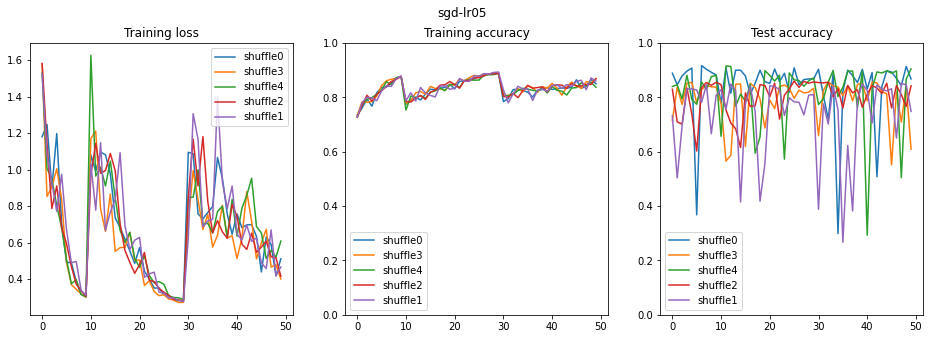

In [5]:
run_dir = Path("runs/benchmark-optimizer")


for group in sorted(run_dir.glob('*/run0')):
    plt.figure(figsize=(16, 5))
    gs = plt.GridSpec(1, 3)
    plt.suptitle(group.parts[-2])
    
    for shuffle in group.glob("shuffle*/"):
        if not (shuffle / 'train.csv').exists():
            continue
        
        ax = plt.subplot(gs[0])
        plt.title("Training loss")
        df = pd.read_csv(shuffle / 'train.csv')
        plt.plot(df.epoch, df.loss, label=shuffle.parts[-1])
        plt.legend()
        
        ax = plt.subplot(gs[1])
        plt.title("Training accuracy")
        df = pd.read_csv(shuffle / 'train.csv')
        plt.plot(df.epoch, df.accuracy, label=shuffle.parts[-1])
        plt.ylim(0, 1)
        plt.legend()
        
        ax = plt.subplot(gs[2])
        plt.title("Test accuracy")
        df = pd.read_csv(shuffle / 'val.csv')
        plt.plot(df.epoch, df.accuracy, label=shuffle.parts[-1])
        plt.ylim(0, 1)
        plt.legend()
        
    plt.show()

Mean accuracy of adam-lr00001 (n=5) 0.7895113636363637
Mean accuracy of adam-lr0001 (n=5) 0.8396333333333332
Mean accuracy of adam-lr001 (n=5) 0.8447159565580618
Mean accuracy of adam-lr01 (n=5) 0.780651098901099
Mean accuracy of adam-lr05 (n=5) 0.7687642857142857
Mean accuracy of sgd-lr00001 (n=5) 0.7550971250971251
Mean accuracy of sgd-lr0001 (n=5) 0.7913
Mean accuracy of sgd-lr001 (n=5) 0.8087354312354312
Mean accuracy of sgd-lr01 (n=5) 0.8400093240093239
Mean accuracy of sgd-lr05 (n=5) 0.847979797979798


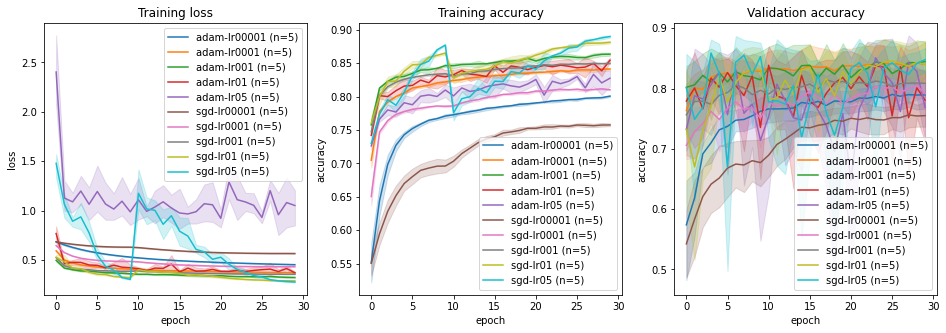

In [6]:
plt.figure(figsize=(16, 5))
gs = plt.GridSpec(1, 3)

last_epoch = 30
    
for group in sorted(run_dir.glob('*/run0')):
    train_dfs = []
    val_dfs = []
    for shuffle in group.glob("shuffle*/"):
        if not (shuffle / 'train.csv').exists():
            continue
        
        df = pd.read_csv(shuffle / 'train.csv')
        train_dfs.append(df)
        
        df = pd.read_csv(shuffle / 'val.csv')
        val_dfs.append(df)
    
    train_df = pd.concat(train_dfs)
    train_df = train_df.reset_index()
    train_df = train_df.loc[train_df.epoch < last_epoch]
    
    val_df = pd.concat(val_dfs)
    val_df = val_df.reset_index()
    val_df = val_df.loc[val_df.epoch < last_epoch]
    
    label = f"{group.parts[-2]} (n={len(train_dfs)})"
    ax = plt.subplot(gs[0])
    plt.title("Training loss")
    sns.lineplot(data=train_df, x='epoch', y='loss', label=label)
    
    ax = plt.subplot(gs[1])
    plt.title("Training accuracy")
    sns.lineplot(data=train_df, x='epoch', y='accuracy', label=label)
    
    ax = plt.subplot(gs[2])
    plt.title("Validation accuracy")
    sns.lineplot(data=val_df, x='epoch', y='accuracy', label=label)
    
    val_accracy = val_df.groupby('epoch').mean().loc[29, 'accuracy']
    print("Mean accuracy of", label, val_accracy)